In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("dark")

In [2]:
train = pd.read_csv("../data/train_fe_small.csv")
test = pd.read_csv("../data/test_fe.csv")

In [3]:
train.head()

,international_plan,voice_mail_plan,area_code_408,area_code_415,area_code_510,region_Midwest,region_Northeast,region_South,region_West,account_length,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.557851,...,0.611765,0.632805,0.284372,0.368421,0.284177,0.455,0.50,0.455556,0.333333,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.376033,...,0.841176,0.481074,0.449473,0.766917,0.449367,0.470,0.35,0.470370,0.222222,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.611570,...,0.482353,0.545455,0.200399,0.375940,0.200000,0.430,0.20,0.429630,0.111111,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.384298,...,0.335294,0.563895,0.365784,0.503759,0.365823,0.520,0.30,0.520370,0.333333,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.400826,...,0.547059,0.379165,0.463422,0.413534,0.463291,0.000,0.00,0.000000,0.000000,0.0


In [4]:
cols = ['region_South', 'region_West', 'account_length','number_vmail_messages', 'total_day_minutes', 'total_day_calls',
        'total_intl_charge', 'customer_service_calls', 'churn']

In [5]:
train = train[cols]

In [6]:
x_train_use, y_train_use = train.drop("churn", axis = 1), train["churn"]

In [7]:
#x_train_use = x_train_use.drop_duplicates().reset_index(drop=True)

In [8]:
train.shape

(776, 9)

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train_use, y_train_use, train_size=0.8, random_state = 42)

In [10]:
x_train.shape, y_train.shape

((620, 8), (620,))

### Gaussian NB

In [11]:
nb = GaussianNB()
nb.fit(x_train, np.array(y_train).reshape(-1,1))

GaussianNB()

In [12]:
y_pred = nb.predict(x_train)

In [13]:
f1_score(y_train, y_pred)

0.7055016181229774

In [14]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [15]:
model = nb

In [16]:
model.fit(x_train, y_train)

GaussianNB()

In [17]:
y_pred = model.predict(x_train)

In [18]:
f1_score(y_train, y_pred)

0.7055016181229774

In [19]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71       310
         1.0       0.71      0.70      0.71       310

    accuracy                           0.71       620
   macro avg       0.71      0.71      0.71       620
weighted avg       0.71      0.71      0.71       620



In [20]:
train["churn"].value_counts()

0.0    388
1.0    388
Name: churn, dtype: int64

In [21]:
import seaborn as sns; sns.set_style("darkgrid")

<AxesSubplot:>

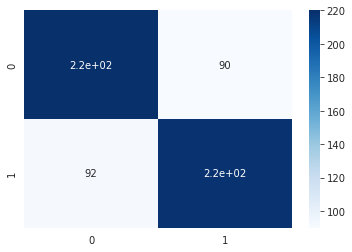

In [22]:
conf = confusion_matrix(y_train, y_pred)
sns.heatmap(conf, annot=True, cmap= "Blues")

In [23]:
y_pred_val = model.predict(x_val)

In [24]:
f1_score(y_val, y_pred_val)

0.7581699346405228

In [25]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.75      0.78      0.77        78
         1.0       0.77      0.74      0.76        78

    accuracy                           0.76       156
   macro avg       0.76      0.76      0.76       156
weighted avg       0.76      0.76      0.76       156



#### Extracting results

In [26]:
import time
start = time.time()
model.fit(x_train_use, y_train_use)
elapsed = time.time() - start

In [27]:
pred_use = model.predict(x_train_use)

In [28]:
cross_val_score(model, x_train_use, y_train_use, scoring="f1")

array([0.68918919, 0.63225806, 0.69333333, 0.72611465, 0.7755102 ])

In [29]:
print(classification_report(y_train_use, pred_use))

              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72       388
         1.0       0.72      0.72      0.72       388

    accuracy                           0.72       776
   macro avg       0.72      0.72      0.72       776
weighted avg       0.72      0.72      0.72       776



In [30]:
f1_train = f1_score(y_train_use, pred_use)
prec_train = precision_score(y_train_use, pred_use)
recall_train = recall_score(y_train_use, pred_use)

In [31]:
test = test[cols]

In [32]:
test

,region_South,region_West,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_intl_charge,customer_service_calls,churn
0,1.0,0.0,0.479339,0.00,0.525941,0.60625,0.435185,0.111111,0.0
1,0.0,0.0,0.264463,0.00,0.368016,0.85625,0.635185,0.444444,1.0
2,0.0,0.0,0.661157,0.00,0.948974,0.41875,0.270370,0.444444,1.0
3,1.0,0.0,0.454545,0.00,0.314709,0.64375,0.385185,0.222222,0.0
4,0.0,1.0,0.198347,0.00,0.340080,0.73125,0.555556,0.111111,0.0
...,...,...,...,...,...,...,...,...,...
662,0.0,0.0,0.466942,0.52,0.390821,0.55000,0.575926,0.222222,0.0
663,1.0,0.0,0.433884,0.58,0.238312,0.81875,0.405556,0.111111,0.0
664,0.0,0.0,0.243802,0.00,0.552737,0.73750,0.659259,0.333333,0.0
665,1.0,0.0,0.652893,0.00,0.484036,0.71250,0.579630,0.111111,0.0


In [33]:
x_test, y_test = test.drop("churn", axis =1), test["churn"]

In [34]:
pred_test = model.predict(x_test)

In [35]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.95      0.73      0.83       572
         1.0       0.32      0.76      0.45        95

    accuracy                           0.74       667
   macro avg       0.63      0.75      0.64       667
weighted avg       0.86      0.74      0.77       667



In [36]:
f1_test = f1_score(y_test, pred_test)
prec_test = precision_score(y_test, pred_test)
recall_test = recall_score(y_test, pred_test)

In [37]:
conf = confusion_matrix(y_test, pred_test)

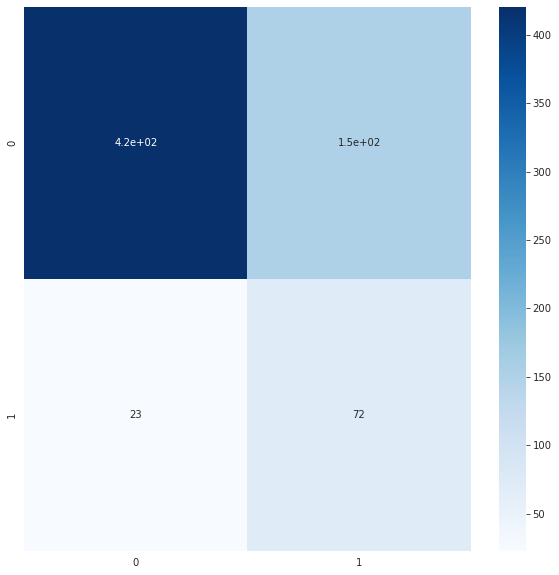

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(conf, annot=True, cmap="Blues")
#plt.show();
plt.savefig("../conf/svc.png")

In [39]:
df = pd.DataFrame()
df["f1_test"] = [f1_test]
df["f1_train"] = f1_train
df["prec_train"] = prec_train
df["prec_test"] = prec_test
df["recall_train"] = recall_train
df["recall_test"] = recall_test
df["model"] = "Naive Bayes"
df["elapsed"] = elapsed

In [40]:
df

,f1_test,f1_train,prec_train,prec_test,recall_train,recall_test,model,elapsed
0,0.451411,0.72093,0.722798,0.321429,0.719072,0.757895,Naive Bayes,0.005447


In [41]:
df.to_csv("../results/regular/nb.csv", index=False)